# VectorField

Moduł zawierający funkcje, umożliwiające wygodne symulowanie ruchu cząstki w **polu wektorowym**. 
Podstawowymi funkcjonalnościami są generowanie pola oraz obliczanie położenia poruszającego się obiektu. 
Dodatkowo moduł umożliwia wizualizację ruchu.

Autorzy: Marcin Miśkiewicz, Mikołaj Langner

In [36]:
#  Lista funkcji z krótkimi opisami:

* field - tworzy wykres pola wektorowego
* positions - oblicza pozycje obiektu poruszającego się wewnątrz pola
* trajectory - tworzy wykres trajektorii obiektu poruszającego się wewnątrz pola
* gradientField - tworzy wykres pola wektorowego z gradientu funkcji
* divergence - oblicza dywergencję pola w danym punkcie
* curl - oblicza rotację (wirowość) pola w danym punkcie
* animate - tworzy animacje cząstek poruszających się wewnątrz pola


LoadError: syntax: "*" is not a unary operator

In [1]:
# konfiguracja

include("vector_field.jl")
using .VectorField
using Makie.AbstractPlotting
AbstractPlotting.inline!(true)

# uwaga: jupyter notebook może pokazywać ostrzeżenie przy rysowaniu wykresów - brak dobrej integracji z biblioteką Makie

false

## 1. field

In [3]:
? field

search: field fieldtype fieldname fieldtypes fieldnames fieldcount fieldoffset



```
field(Fx::Function, Fy::Function; kwargs...)
```

Plot a vector field of two-variable functions.

# Arguments

  * `xbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for x coordinates.
  * `ybounds::Tuple{Real, Real} = (-1, 1)`: boundaries for y coordinates.

---

```
field(Fx::Function, Fy::Function, Fz::Function; kwargs...)
```

Also for three-variable functions.

# Arguments

  * `zbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for z coordinates.


┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


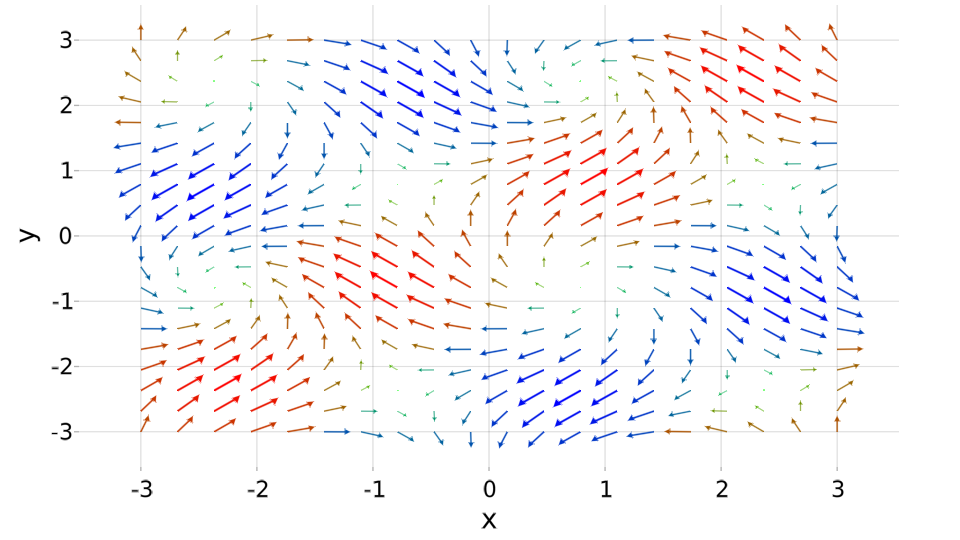

In [4]:
# przykład pola 2D

field((x, y)->sin(x+y), (x, y)->cos(x-y), xbounds=(-3, 3), ybounds=(-3, 3))

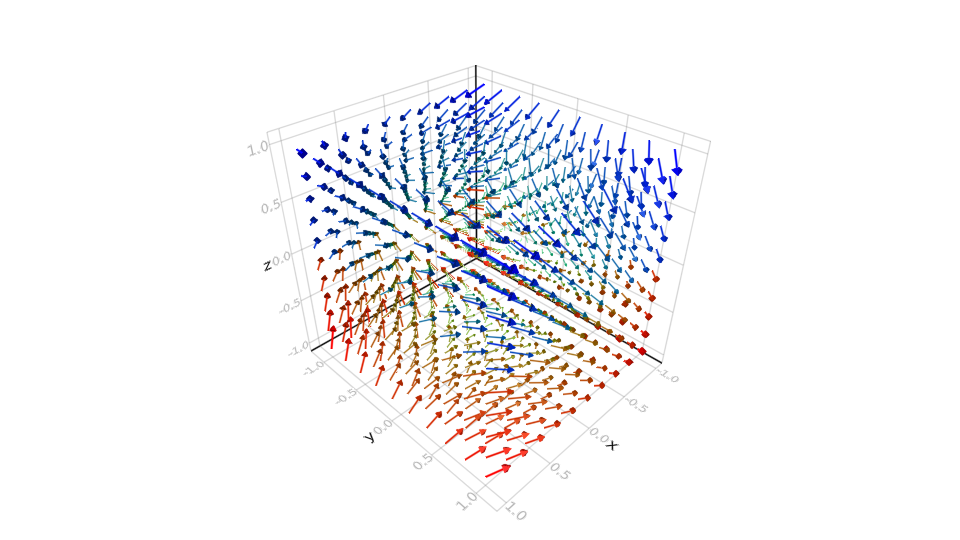

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [5]:
# przykład pola 3D
field((x, y, z)->-x, (x, y, z)->y, (x, y, z)->-z)

## 2. positions

In [6]:
? positions

search: positions position mouseposition mouse_position CompositeException



```
positions(Fx::Function, Fy::Function, startPoint::Array{T, 1} = [0, 0]; kwargs...) where T <: Real
```

Compute positions of an object for vector field of given two-variable functions.

# Arguments

  * `time::Tuple{Real, Real} = (0, 1)`: boundaries for time which positions will be computed in.
  * `timePoints::Integer = 100`: number of positions (accuracy) to compute.

---

```
positions(Fx::Function, Fy::Function, Fz::Function, startPoint::Array{T, 1} = [0, 0, 0]; kwargs...) where T <: Real
```

Also for three-variable functions.


In [7]:
# przykład dla pola 2D
X1, Y1 = positions((x, y)->x, (x, y)->x*y, [4, 2], time=(0, 1))

println(X1[end]) # końcowa współrzędna x cząstki
println(Y1[end]) # końcowa współrzędna y cząstki

10.87312731799792
1931.2072875635015


In [8]:
# przykład dla pola 3D
X2, Y2, Z2 = positions((x, y, z)->x, (x, y, z)->x*y, (x, y, z)->z-y-x, [4, 2, 2], time=(0, 1))

println(X2[end]) # końcowa współrzędna x cząstki
println(Y2[end]) # końcowa współrzędna y cząstki
println(Z2[end]) # końcowa współrzędna y cząstki

10.873127317218389
1931.4637103731704
-229.4987263246789


In [9]:
# dane można dalej analizować
println(max(Z2...))

2.0


## 3. trajectory

In [10]:
? trajectory

search: trajectory



```
trajectory(Fx::Function, Fy::Function, startPoints::Array{Array{T, 1}, 1}; kwargs...) where T <: Real
```

Plot full trajectories for objects with given `startPoints` and two-variable functions.

# Arguments

  * `showField::Bool = :false`: flag to indicate whether plot vector field (arrows).
  * `time::Tuple{Real, Real} = (0, 1)`: boundaries for time which positions will be computed in.
  * `timePoints::Integer = 100`: number of positions (accuracy) to compute.
  * `xbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for x coordinates.
  * `ybounds::Tuple{Real, Real} = (-1, 1)`: boundaries for y coordinates.
  * `linewidth::Real = 3`: width of trajectories' lines.

---

```
trajectory(Fx::Function, Fy::Function, Fz::Function, startPoints::Array{Array{T, 1}, 1}; kwargs...) where T <: Real
```

Also for three-variable functions.

# Arguments

  * `zbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for z coordinates.


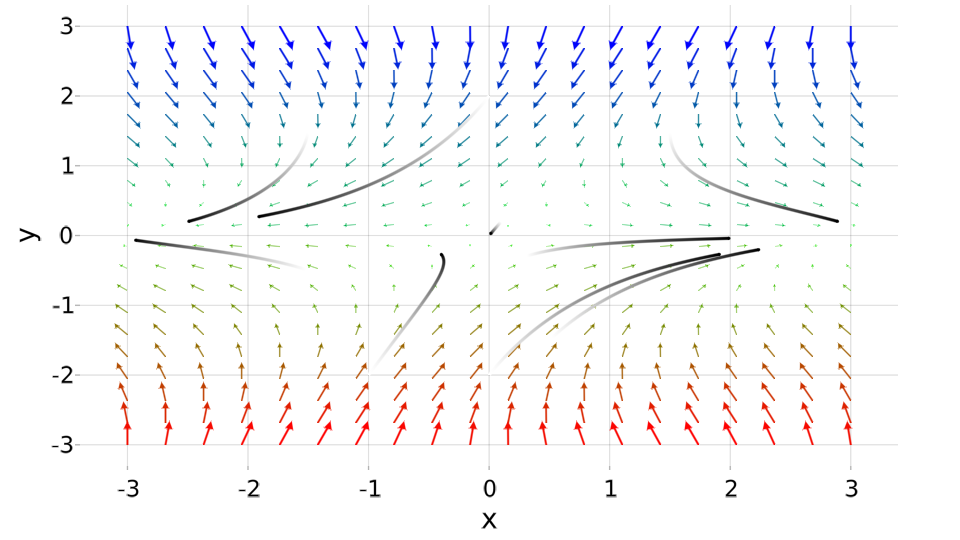

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [11]:
# przykład dla pola 2D

particles = [[1.5, 1.5], [-1.5, 1.5], [0.5, -1.5], [-1.5, -0.5], [0.1, 0.2], [-1, -2], [0, 2], [0, -2], [0.3, -0.3]]

trajectory((x, y)->sin(x-y), (x, y)->-y, particles,
            showField=:true, time = (0, 2), xbounds=(-3, 3), ybounds=(-3, 3))

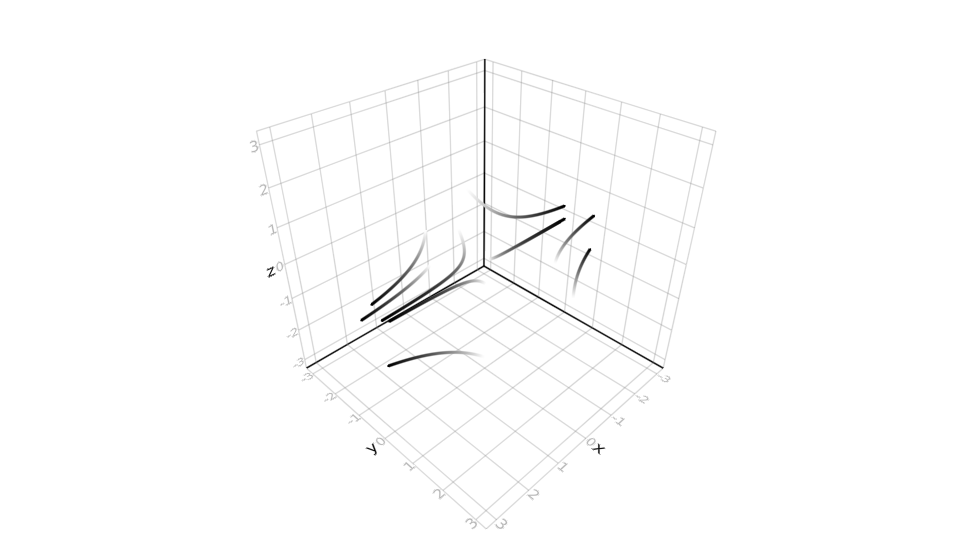

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [12]:
# przykład dla pola 3D

particles = [[1.5, 1.5, 1], [-1.5, 1.5, -1], [0.5, -1.5, 0.5], [-1.5, -0.5, -0.5], 
             [0.1, 0.2, 0.3], [-1, -2, -0.3], [0, 2, 1], [0, -2, -1], [0.3, -0.3, 2], [0, 0, -3]]

trajectory((x, y, z)->x-y-z, (x, y, z)->-y, (x, y, z)->-z, particles,
            showField=:false, time = (0, 3), xbounds=(-3, 3), ybounds=(-3, 3), zbounds=(-3, 3))

## 4. gradientField

In [13]:
? gradientField

search: gradientField



```
gradientField(f::Function; kwargs...)
```

Plot a vector field of given two or three-variable function's gradient.

# Arguments

  * `showContour::Bool = :false`: flag to indicate whether create contour plot.
  * `xbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for x coordinates.
  * `ybounds::Tuple{Real, Real} = (-1, 1)`: boundaries for y coordinates.
  * `zbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for z coordinates.


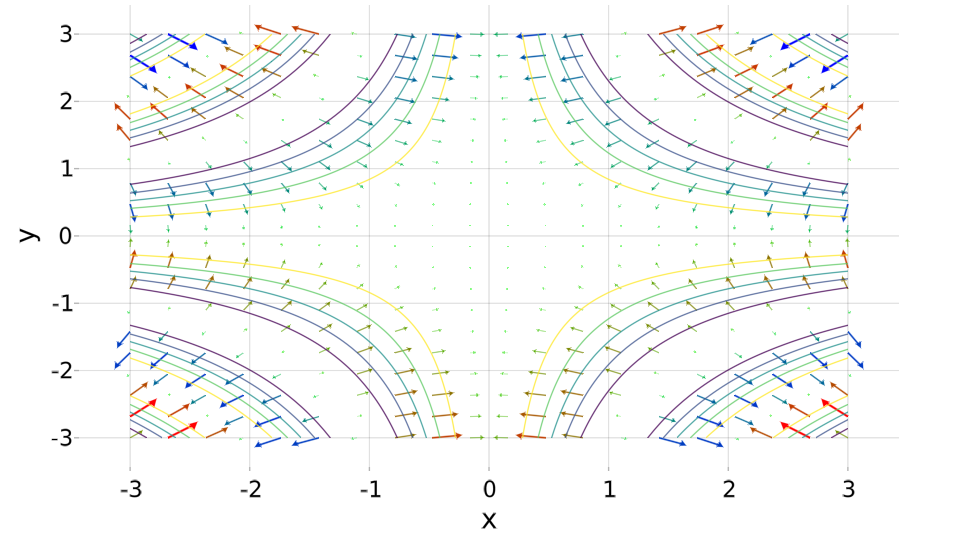

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [14]:
# przykład dla pola 2D
gradientField((x, y)->cos(x*y), showContour=:true, xbounds=(-3, 3), ybounds=(-3, 3))

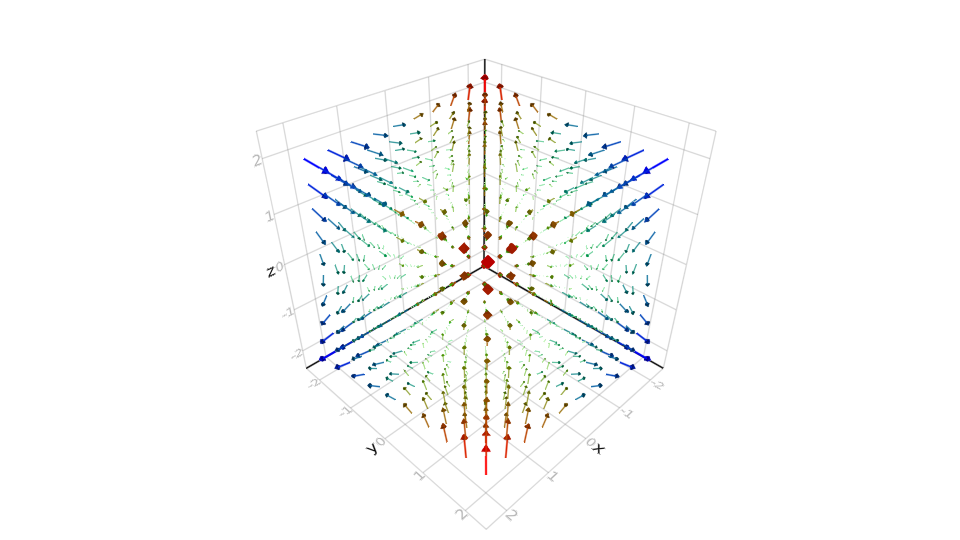

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [15]:
# przykład dla pola 3D

gradientField((x, y, z)->x*y*z, xbounds=(-2, 2), ybounds=(-2, 2), zbounds=(-2, 2))

## 5. divergence

In [16]:
? divergence

search: divergence



```
divergence(point::Array{T, 1}, Fx::Function, Fy::Function [, Fz]) where T <: Real
```

Compute the divergence in given `point` of the two or three-variable functions by the formula:     div(F) = ∇ · F


In [17]:
# przykład dla pola 2D

divergence([2, -2], (x, y)->sin(x+y), (x, y)->cos(x-y))

0.2431975046920718

In [18]:
# przykład dla pola 3D

divergence([2, -2, -2], (x, y, z)->sin(x+y), (x, y, z)->cos(x-y), (x, y, z)->z)

1.2431975046920718

## 6. curl

In [19]:
? curl

search: curl current_task occursin cumprod cumprod! Cushort Cuchar



```
curl(point::Array{T, 1}, Fx::Function, Fy::Function [, Fz]) where T <: Real
```

Compute the curl in given `point` of the two or three-variable functions by the formula:     curl(F) = ∇ ✖ F


In [20]:
# przykład dla pola 2D

curl([2, -2], (x, y)->sin(x+y), (x, y)->cos(x-y))

3-element Array{Float64,1}:
  0.0               
  0.0               
 -0.2431975046920718

In [21]:
# przykład dla pola 3D

curl([2, -2, -2], (x, y, z)->sin(x+y), (x, y, z)->cos(x*y), (x, y, z)->z)

3-element Array{Float64,1}:
 0.0               
 0.0               
 0.5136049906158564

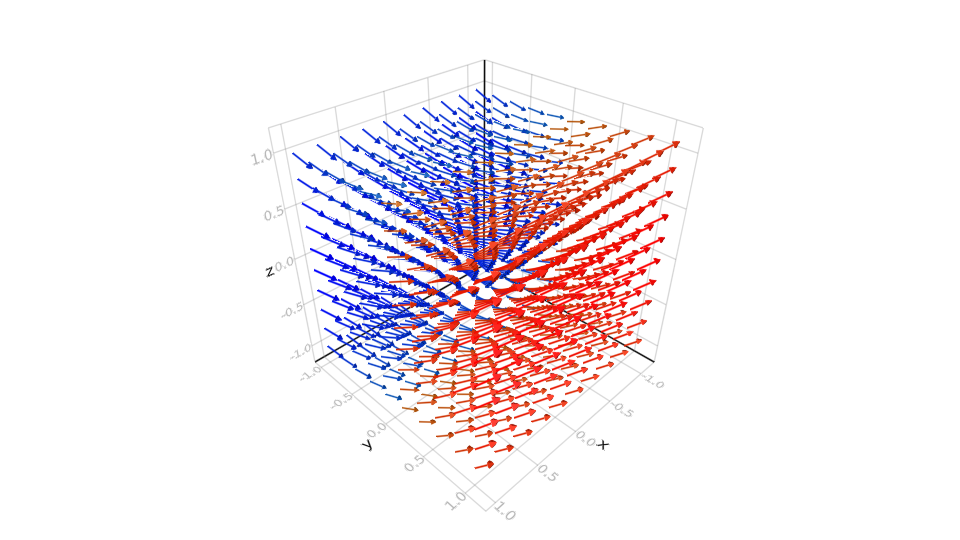

┌ Warning: Showing scene as text. This happens because `AbstractPlotting.inline!(true)` is set.
│ This needs to be false to show a plot in a window when in the REPL.
└ @ AbstractPlotting C:\Users\mikil\.julia\packages\AbstractPlotting\jOgYQ\src\display.jl:135


In [34]:
# możemy też bezpośrednio łączyć funkcjonalności
#= i tak np. z faktu, że funkcja rotacji dla podanych funkcji trzech zmiennych
    zwraca w rzeczywistości pole wektorowe, możemy je od razu wygenerować =#

parametrizedCurl(a, b, c) = curl([a, b, c], (x, y, z)->cos(y), (x, y, z)->sin(z), (x, y, z)->-x)
field((x, y, z)->parametrizedCurl(x, y, z)[1],
        (x, y, z)->parametrizedCurl(x, y, z)[2],
        (x, y, z)->parametrizedCurl(x, y, z)[3])

## 7. animate

In [22]:
? animate

search: animate



```
animate(Fx::Function, Fy::Function, startPoints::Array{Array{T, 1}, 1}, filename::String; kwargs...) where T <: Real
```

Create and save in `filename` an animation of objects' with `startPoints` movement in vector field of given two-variable functions.

# Arguments

  * `showField::Bool = :false`: flag to indicate whether plot vector field (arrows).
  * `time::Tuple{Real, Real} = (0, 1)`: boundaries for time which positions will be computed in.
  * `timePoints::Integer = 100`: number of positions (accuracy) to compute.
  * `xbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for x coordinates.
  * `ybounds::Tuple{Real, Real} = (-1, 1)`: boundaries for y coordinates.
  * `fps::Integer = 30`: framerate of the animation.
  * `linewidth::Real = 3`: width of trajectories' lines.

---

```
animate(Fx::Function, Fy::Function, Fz::Function, startPoints::Array{Array{T, 1}, 1}, filename::String; kwargs...) where T <: Real
```

Also for three-variable functions.

# Arguments

  * `zbounds::Tuple{Real, Real} = (-1, 1)`: boundaries for z coordinates.


In [23]:
# przykładowy kod

# particles = [[0.5, 0.5], [-0.5, 0.5], [-0.5, -0.5], [0.5, -0.5], [1.5, 1.5], [-1.5, 1.5], [-1.5, -1.5], [1.5, -1.5]]
# animate((x, y)->sin(x+y), (x, y)->cos(x-y), particles, "Example.gif", 
#          showField=:true, time=(0., 5.), xbounds=(-4, 4), ybounds=(-4, 4))

In [32]:
### Przykładowe animacje

![SegmentLocal](animation_examples/1.gif "1")

![SegmentLocal](animation_examples/2.gif "2")

![SegmentLocal](animation_examples/3.gif "3")

![SegmentLocal](animation_examples/4.gif "4")